## 신경망 학습  
MNIST 숫자 데이터를 인식하고 검증하는 코드를 구현해 보자

In [ ]:
import os, sys, time
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from ch03.two_layer_net import TwoLayerNet

0 train acc, test acc | 0.09871666666666666, 0.098
600 train acc, test acc | 0.9085833333333333, 0.9115
1200 train acc, test acc | 0.931, 0.9314
1800 train acc, test acc | 0.9436833333333333, 0.9426
2400 train acc, test acc | 0.9510333333333333, 0.9486
3000 train acc, test acc | 0.9567, 0.9539
3600 train acc, test acc | 0.9622166666666667, 0.9586
4200 train acc, test acc | 0.96535, 0.961
4800 train acc, test acc | 0.96815, 0.962
5400 train acc, test acc | 0.9704, 0.9652
6000 train acc, test acc | 0.9721333333333333, 0.9653
6600 train acc, test acc | 0.9751666666666666, 0.9671
7200 train acc, test acc | 0.97605, 0.968
7800 train acc, test acc | 0.9771, 0.9687
8400 train acc, test acc | 0.9784666666666667, 0.9697
9000 train acc, test acc | 0.9794333333333334, 0.97
9600 train acc, test acc | 0.9801833333333333, 0.971
run time:  15.39546 sec


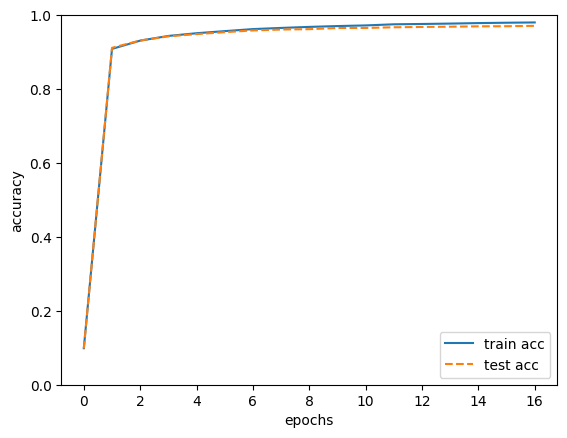

In [4]:
start_time = time.time()
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# 히든 사이즈 따라서 다르긴 하다 -> 많을수록 시간이 오래 걸리고 적을수록 학습률이 낮아짐 
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼 파라미터 세팅
iters_num = 10000   # 이터레이트 넘버
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.5 # 학습률

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
train_acc = 0
test_acc = 0

for i in range(iters_num):
    # 미니배치 획득
    # train_size 6만개 중 랜덤 100개를 뽑아 배치를 구성
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    # grad = network.numerical_gradient(x_batch,t_batch) # 수치미분
    grad = network.gradient(x_batch, t_batch) # 역전파법

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1 에폭당 정확도 계산
    if i%iter_per_epoch == 0:
        # train 데이터에 대한 정확도(6만장)
        train_acc = network.accuracy(x_train, t_train)
        # test 1만장에 대한 정확도 계산
        test_acc = network.accuracy(x_test, t_test)        
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(i, "train acc, test acc | " + str(train_acc) + ", " + str(test_acc))
# print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

end_time = time.time()
print(f'run time: {end_time - start_time: .5f} sec')

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))

plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()